In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


##PART -A

In [6]:
STUDENT_ID = "PES2UG23CS358"

# AUTOMATIC ASSIGNMENT BASED ON SRN - DO NOT MODIFY

In [7]:
def get_student_assignment(student_id):
  """
  Generate unique polynomial TYPE and architecture based on student ID
  Uses last 3 digits of student ID for assignment
  """

  last_three = int(student_id[-3:])

  poly_type = last_three % 5

  np.random.seed(last_three)

  if poly_type == 0:
      degree = 2
      a = 0
      b = np.random.uniform(0.8, 1.5)
      c = np.random.uniform(3.0, 8.0)
      d = np.random.uniform(5.0, 15.0)
      poly_desc = f"QUADRATIC: y = {b:.2f}x² + {c:.2f}x + {d:.2f}"

  elif poly_type == 1:
      degree = 3
      a = np.random.uniform(1.8, 2.5)
      b = np.random.uniform(-1.2, 0.2)
      c = np.random.uniform(3.0, 6.0)
      d = np.random.uniform(8.0, 12.0)
      poly_desc = f"CUBIC: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f}"

  elif poly_type == 2:
      degree = 4
      a = np.random.uniform(0.008, 0.02)
      b = np.random.uniform(1.5, 2.2)
      c = np.random.uniform(-1.0, 0.5)
      d = np.random.uniform(2.0, 5.0)
      e = np.random.uniform(8.0, 12.0)
      poly_desc = f"QUARTIC: y = {a:.4f}x⁴ + {b:.2f}x³ + {c:.2f}x² + {d:.2f}x + {e:.2f}"
      coefficients = (a, b, c, d, e)

  elif poly_type == 3:
      degree = "sine"
      a = np.random.uniform(1.5, 2.8)
      b = np.random.uniform(-0.8, 0.8)
      c = np.random.uniform(3.0, 6.0)
      d = np.random.uniform(8.0, 12.0)
      freq = np.random.uniform(0.02, 0.05)
      amp = np.random.uniform(5.0, 15.0)
      poly_desc = f"CUBIC + SINE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {amp:.1f}*sin({freq:.3f}x)"
      coefficients = (a, b, c, d, freq, amp)

  else:
      degree = "inverse"
      a = np.random.uniform(1.8, 2.5)
      b = np.random.uniform(-1.0, 0.5)
      c = np.random.uniform(3.0, 6.0)
      d = np.random.uniform(8.0, 12.0)
      inv_coeff = np.random.uniform(50, 200)
      poly_desc = f"CUBIC + INVERSE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {inv_coeff:.1f}/x"
      coefficients = (a, b, c, d, inv_coeff)


  if poly_type in [0, 1]:
      coefficients = (a, b, c, d)


  noise_std = np.random.uniform(1.5, 2.5)


  arch_type = last_three % 4
  architectures = {
      0: {"hidden1": 64, "hidden2": 64, "lr": 0.001, "batch_desc": "Balanced Architecture"},
      1: {"hidden1": 32, "hidden2": 72, "lr": 0.005, "batch_desc": "Narrow-to-Wide Architecture"},
      2: {"hidden1": 72, "hidden2": 32, "lr": 0.001, "batch_desc": "Wide-to-Narrow Architecture"},
      3: {"hidden1": 96, "hidden2": 96, "lr": 0.003, "batch_desc": "Large Balanced Architecture"}
  }

  return {
      "polynomial_type": poly_type,
      "degree": degree,
      "coefficients": coefficients,
      "polynomial_desc": poly_desc,
      "noise_std": noise_std,
      "architecture": architectures[arch_type],
      "student_seed": last_three
  }

# Get your assignment
assignment = get_student_assignment(STUDENT_ID)
poly_type = assignment["polynomial_type"]
degree = assignment["degree"]
coefficients = assignment["coefficients"]
noise_std = assignment["noise_std"]
hidden1 = assignment["architecture"]["hidden1"]
hidden2 = assignment["architecture"]["hidden2"]
learning_rate = assignment["architecture"]["lr"]

print("="*70)
print(f"ASSIGNMENT FOR STUDENT ID: {STUDENT_ID}")
print("="*70)
print(f"Polynomial Type: {assignment['polynomial_desc']}")
print(f"Noise Level: ε ~ N(0, {noise_std:.2f})")
print(f"Architecture: Input(1) → Hidden({hidden1}) → Hidden({hidden2}) → Output(1)")
print(f"Learning Rate: {learning_rate}")
print(f"Architecture Type: {assignment['architecture']['batch_desc']}")
print("="*70)


ASSIGNMENT FOR STUDENT ID: PES2UG23CS358
Polynomial Type: CUBIC + SINE: y = 2.43x³ + -0.50x² + 4.39x + 10.81 + 10.9*sin(0.046x)
Noise Level: ε ~ N(0, 1.82)
Architecture: Input(1) → Hidden(72) → Hidden(32) → Output(1)
Learning Rate: 0.001
Architecture Type: Wide-to-Narrow Architecture


# DATASET GENERATION - DO NOT MODIFY

In [8]:
np.random.seed(assignment["student_seed"])

n_samples = 100000
x = np.random.uniform(-100, 100, n_samples)


if poly_type == 0:
    _, b, c, d = coefficients
    y = b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 1:
    a, b, c, d = coefficients
    y = a * x**3 + b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y = a * x**4 + b * x**3 + c * x**2 + d * x + e + np.random.normal(0, noise_std, n_samples)

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y = a * x**3 + b * x**2 + c * x + d + amp * np.sin(freq * x) + np.random.normal(0, noise_std, n_samples)

else:
    a, b, c, d, inv_coeff = coefficients

    y = a * x**3 + b * x**2 + c * x + d + inv_coeff / (x + np.sign(x) * 0.1) + np.random.normal(0, noise_std, n_samples)


df = pd.DataFrame({'x': x, 'y': y})
df.to_csv('student_polynomial_dataset.csv', index=False)
print(f"Dataset with {n_samples:,} samples generated and saved!")

X = df['x'].values.reshape(-1, 1)
Y = df['y'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_test_scaled = scaler_Y.transform(Y_test)

print(f"Training samples: {len(X_train_scaled):,}")
print(f"Test samples: {len(X_test_scaled):,}")

Dataset with 100,000 samples generated and saved!
Training samples: 80,000
Test samples: 20,000


# ACTIVATION FUNCTIONS- TODO: IMPLEMENT

In [15]:
def relu(z):
  #Todo implement the Relu formula
  return np.maximum(0, z)

def relu_derivative(z):
    #Todo implement the Relu derivative formula
  return (z > 0).astype(float)

# LOSS FUNCTION- TODO: IMPLEMENT

---



In [16]:
def mse_loss(y_true, y_pred):
  #Todo implement the MSE formula
  return np.mean((y_pred - y_true)**2)

# WEIGHT INITIALIZATION - TODO: IMPLEMENT XAVIER INITIALIZATION
## **Xavier (Glorot) Initialization**

When training neural networks, how we initialize weights matters.  
- If weights are **too small** → activations and gradients vanish.  
- If weights are **too large** → activations and gradients explode.  

#**Xavier initialization** (Glorot & Bengio, 2010) balances this by keeping the variance of activations roughly the same across all layers.

---

### Formula

Let:  
- **fan_in** = number of input units to a layer  
- **fan_out** = number of output units from a layer  

The variance of weights is:

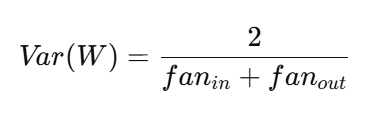


##Two common forms:  

#**Normal distribution:**  
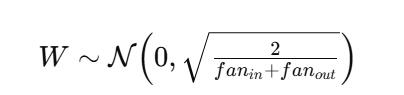

#**Uniform distribution:**  
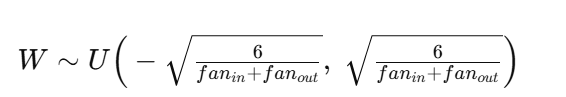

Biases are initialized to **0**.

---

### In This Assignment
- **W1 (input → hidden1):** `fan_in = input_dim`, `fan_out = hidden1`  
- **W2 (hidden1 → hidden2):** `fan_in = hidden1`, `fan_out = hidden2`  
- **W3 (hidden2 → output):** `fan_in = hidden2`, `fan_out = output_dim`  

Your task: compute the correct `xavier_std` for each layer, sample weights from a normal distribution with that std, and set biases = 0.



In [17]:
def xavier_initialization(input_dim, hidden1, hidden2, output_dim):
    """
    TODO: IMPLEMENT XAVIER WEIGHT INITIALIZATION

    Xavier initialization: weights ~ N(0, sqrt(2/(fan_in + fan_out)))
    Biases should be initialized to zeros

    Args:
        input_dim: Size of input layer (1)
        hidden1: Size of first hidden layer
        hidden2: Size of second hidden layer
        output_dim: Size of output layer (1)

    Returns:
        W1, b1, W2, b2, W3, b3: Initialized weights and biases
    """
    np.random.seed(assignment["student_seed"])

    # TODO: Calculate Xavier standard deviation for each layer
    # Hint: xavier_std = sqrt(2 / (fan_in + fan_out))

    # TODO: Initialize W1 (input to first hidden layer)
    xavier_std_1 = np.sqrt(2.0 / (input_dim + hidden1))
    W1 = np.random.randn(input_dim, hidden1) * xavier_std_1
    b1 = np.zeros((1, hidden1))

    # TODO: Initialize W2 (first hidden to second hidden layer)
    xavier_std_2 = np.sqrt(2.0 / (hidden1 + hidden2))
    W2 = np.random.randn(hidden1, hidden2) * xavier_std_2
    b2 = np.zeros((1, hidden2))

    # TODO: Initialize W3 (second hidden to output layer)
    xavier_std_3 = np.sqrt(2.0 / (hidden2 + output_dim))
    W3 = np.random.randn(hidden2, output_dim) * xavier_std_3
    b3 = np.zeros((1, output_dim))

    return W1, b1, W2, b2, W3, b3

# FORWARD PROPAGATION - TODO: IMPLEMENT

In [18]:
def forward_pass(X, W1, b1, W2, b2, W3, b3):
    """
    TODO: IMPLEMENT FORWARD PROPAGATION

    Perform forward pass through the network:
    Input → Hidden1(ReLU) → Hidden2(ReLU) → Output(Linear)

    Args:
        X: Input data (batch_size, 1)
        W1, b1: First layer weights and biases
        W2, b2: Second layer weights and biases
        W3, b3: Output layer weights and biases

    Returns:
        z1, a1, z2, a2, z3: Pre-activations and activations for each layer

    Hint:
        z = X @ W + b  (linear transformation)
        a = activation_function(z)
    """

    # TODO: First hidden layer
    z1 = X @ W1 + b1
    a1 = relu(z1)  # Apply ReLU activation

    # TODO: Second hidden layer
    z2 = a1 @ W2 + b2
    a2 = relu(z2)  # Apply ReLU activation

    # TODO: Output layer
    z3 = a2 @ W3 + b3

    return z1, a1, z2, a2, z3

# BACKWARD PROPAGATION - TODO:IMPLEMENT

In [19]:
def backward_pass(X, Y_true, z1, a1, z2, a2, Y_pred, W2, W3):
    """
    TODO: IMPLEMENT BACKPROPAGATION

    Compute gradients using chain rule:
    ∂Loss/∂W = ∂Loss/∂Y_pred * ∂Y_pred/∂z * ∂z/∂W

    Args:
        X: Input data
        Y_true: True target values
        z1, a1, z2, a2: Forward pass intermediate values
        Y_pred: Network predictions (z3)
        W2, W3: Weights (needed for gradient computation)

    Returns:
        dW1, db1, dW2, db2, dW3, db3: Gradients for all parameters
    """

    m = len(X)  # Batch size

    # TODO: Output layer gradients
    # Start with derivative of MSE
    dY_pred = (2.0/m) * (Y_pred - Y_true)

    # TODO: Third layer (Output) gradients
    dW3 = a2.T @ dY_pred
    db3 = np.sum(dY_pred, axis=0, keepdims=True)

    # TODO: Second hidden layer gradients
    da2 = dY_pred @ W3.T
    dz2 = da2 * relu_derivative(z2)
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    # TODO: First hidden layer gradients
    da1 = dz2 @ W2.T
    dz1 = da1 * relu_derivative(z1)
    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3

# TRAINING FUNCTION - TODO:  COMPLETE IMPLEMENTATION

In [20]:
def train_neural_network(X_train, Y_train, X_test, Y_test, epochs=200, patience=10):
    """
    TODO: COMPLETE THE TRAINING LOOP

    Implement training with early stopping and track losses

    Args:
        X_train, Y_train: Training data
        X_test, Y_test: Test data for validation
        epochs: Maximum number of training epochs
        patience: Early stopping patience

    Returns:
        best_weights: Best model weights
        train_losses: Training loss history
        test_losses: Test loss history
    """


    W1, b1, W2, b2, W3, b3 = xavier_initialization(1, hidden1, hidden2, 1)

    best_test_loss = float('inf')
    best_weights = None
    patience_counter = 0

    train_losses = []
    test_losses = []

    print("Starting training...")
    print(f"Architecture: 1 → {hidden1} → {hidden2} → 1")
    print(f"Learning Rate: {learning_rate}")
    print(f"Max Epochs: {epochs}, Early Stopping Patience: {patience}")
    print("-" * 50)

    for epoch in range(epochs):


        z1, a1, z2, a2, Y_pred_train = forward_pass(X_train, W1, b1, W2, b2, W3, b3)


        train_loss = mse_loss(Y_train, Y_pred_train)


        dW1, db1, dW2, db2, dW3, db3 = backward_pass(X_train, Y_train, z1, a1, z2, a2, Y_pred_train, W2, W3)


        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W3 -= learning_rate * dW3
        b3 -= learning_rate * db3


        _, _, _, _, Y_pred_test = forward_pass(X_test, W1, b1, W2, b2, W3, b3)
        test_loss = mse_loss(Y_test, Y_pred_test)


        train_losses.append(train_loss)
        test_losses.append(test_loss)

        if (epoch + 1) % 20 == 0:
            print(f"Epoch {epoch+1:3d}: Train Loss = {train_loss:.6f}, Test Loss = {test_loss:.6f}")

        if test_loss < best_test_loss:
            best_test_loss = test_loss
            best_weights = (W1.copy(), b1.copy(), W2.copy(), b2.copy(), W3.copy(), b3.copy())
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            print(f"Best test loss: {best_test_loss:.6f}")
            break

    return best_weights, train_losses, test_losses


# EXECUTE TRAINING

In [21]:
print("Training Neural Network with your specific configuration...")
weights, train_losses, test_losses = train_neural_network(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    epochs=500, patience=10
)

Training Neural Network with your specific configuration...
Starting training...
Architecture: 1 → 72 → 32 → 1
Learning Rate: 0.001
Max Epochs: 500, Early Stopping Patience: 10
--------------------------------------------------
Epoch  20: Train Loss = 0.743100, Test Loss = 0.739098
Epoch  40: Train Loss = 0.698949, Test Loss = 0.695342
Epoch  60: Train Loss = 0.658704, Test Loss = 0.655415
Epoch  80: Train Loss = 0.621762, Test Loss = 0.618771
Epoch 100: Train Loss = 0.587417, Test Loss = 0.584663
Epoch 120: Train Loss = 0.555400, Test Loss = 0.552870
Epoch 140: Train Loss = 0.525527, Test Loss = 0.523189
Epoch 160: Train Loss = 0.497631, Test Loss = 0.495475
Epoch 180: Train Loss = 0.471856, Test Loss = 0.469880
Epoch 200: Train Loss = 0.448334, Test Loss = 0.446523
Epoch 220: Train Loss = 0.426570, Test Loss = 0.424896
Epoch 240: Train Loss = 0.406761, Test Loss = 0.405239
Epoch 260: Train Loss = 0.389126, Test Loss = 0.387712
Epoch 280: Train Loss = 0.373004, Test Loss = 0.371677
Ep

# RESULTS VISUALIZATION

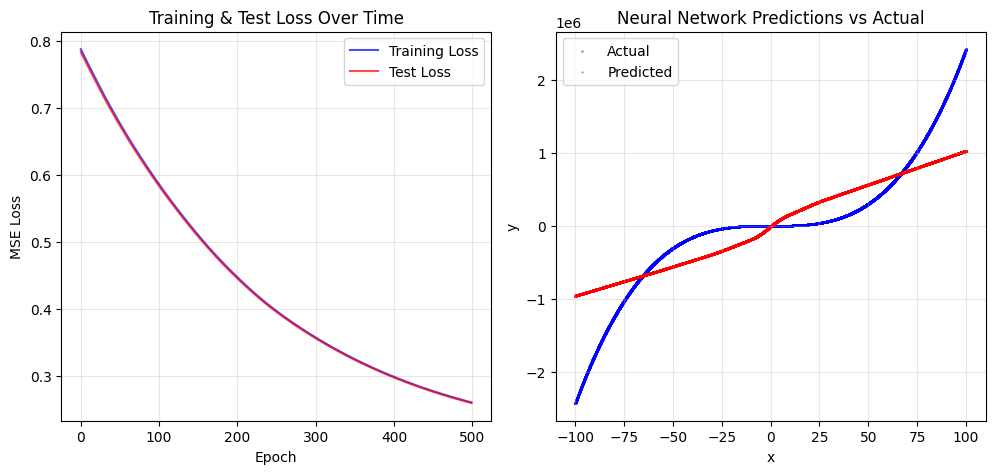

In [22]:
# Plot training progress
plt.figure(figsize=(15, 5))

# Loss curves
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training Loss', color='blue', alpha=0.7)
plt.plot(test_losses, label='Test Loss', color='red', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training & Test Loss Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

# Get final predictions for visualization
W1, b1, W2, b2, W3, b3 = weights
_, _, _, _, Y_pred_scaled = forward_pass(X_test_scaled, W1, b1, W2, b2, W3, b3)

# Inverse transform to original scale
Y_test_orig = scaler_Y.inverse_transform(Y_test_scaled)
Y_pred_orig = scaler_Y.inverse_transform(Y_pred_scaled)
X_test_orig = scaler_X.inverse_transform(X_test_scaled)

# Predictions vs Actual
plt.subplot(1, 3, 2)
plt.scatter(X_test_orig, Y_test_orig, s=1, alpha=0.3, label='Actual', color='blue')
plt.scatter(X_test_orig, Y_pred_orig, s=1, alpha=0.3, label='Predicted', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Predictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

# Residual plot
# plt.subplot(1, 3, 3)
# residuals = Y_test_orig.flatten() - Y_pred_orig.flatten()
# plt.scatter(X_test_orig, residuals, s=1, alpha=0.3, color='green')
# plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
# plt.xlabel('x')
# plt.ylabel('Residuals (Actual - Predicted)')
# plt.title('Residual Analysis')
# plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

SPECIFIC PREDICTION TEST

In [23]:

x_test_value = 90.2
x_new = np.array([[x_test_value]])
x_new_scaled = scaler_X.transform(x_new)

_, _, _, _, y_pred_scaled = forward_pass(x_new_scaled, W1, b1, W2, b2, W3, b3)
y_pred = scaler_Y.inverse_transform(y_pred_scaled)

if poly_type == 0:
    _, b, c, d = coefficients
    y_true = b * x_test_value**2 + c * x_test_value + d

elif poly_type == 1:
    a, b, c, d = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y_true = a * x_test_value**4 + b * x_test_value**3 + c * x_test_value**2 + d * x_test_value + e

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + amp * np.sin(freq * x_test_value)

else:
    a, b, c, d, inv_coeff = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + inv_coeff / (x_test_value + np.sign(x_test_value) * 0.1)

print("\n" + "="*60)
print("PREDICTION RESULTS FOR x = 90.2")
print("="*60)
print(f"Neural Network Prediction: {y_pred[0][0]:,.2f}")
print(f"Ground Truth (formula):    {y_true:,.2f}")
print(f"Absolute Error:            {abs(y_pred[0][0] - y_true):,.2f}")
print(f"Relative Error:            {abs(y_pred[0][0] - y_true)/abs(y_true)*100:.3f}%")




PREDICTION RESULTS FOR x = 90.2
Neural Network Prediction: 937,723.35
Ground Truth (formula):    1,777,971.58
Absolute Error:            840,248.22
Relative Error:            47.259%


# PERFORMANCE METRICS

In [24]:
# Calculate final performance metrics
final_train_loss = train_losses[-1] if train_losses else float('inf')
final_test_loss = test_losses[-1] if test_losses else float('inf')

# Calculate R² score
y_test_mean = np.mean(Y_test_orig)
ss_res = np.sum((Y_test_orig - Y_pred_orig) ** 2)
ss_tot = np.sum((Y_test_orig - y_test_mean) ** 2)
r2_score = 1 - (ss_res / ss_tot)

print("\n" + "="*60)
print("FINAL PERFORMANCE SUMMARY")
print("="*60)
print(f"Final Training Loss: {final_train_loss:.6f}")
print(f"Final Test Loss:     {final_test_loss:.6f}")
print(f"R² Score:           {r2_score:.4f}")
print(f"Total Epochs Run:   {len(train_losses)}")


FINAL PERFORMANCE SUMMARY
Final Training Loss: 0.260634
Final Test Loss:     0.259715
R² Score:           0.7393
Total Epochs Run:   500
